In [1]:

# Import required Libaries
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, models, layers, regularizers

In [2]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import numpy as np
# normalization of data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from matplotlib import pyplot  as plt

In [45]:
# create the object for the normalization
Normalize=preprocessing.StandardScaler()

In [46]:
# Load the Datasets
df_train=pd.read_csv("aps_failure_training_set.csv",skiprows=20)
df_test=pd.read_csv("aps_failure_test_set.csv",skiprows=20)

In [47]:
# replace the class col from from categorical to binary numerical form
df_test["class"]=df_test["class"].replace({"neg":0,"pos":1})
df_train["class"]=df_train["class"].replace({"neg":0,"pos":1})

In [48]:
# replace np with NAN
df_train.replace({"na":np.NAN},inplace=True)
df_test.replace({"na":np.NAN},inplace=True)

In [49]:
# change column datatype from object to float
df_train=df_train.astype(float)
df_test=df_test.astype(float)

In [50]:
# drop the null values and save to new frame df_tr_null
df_tr_null=df_train.dropna()
df_test_null=df_test.dropna()

In [51]:
# Prepare the data inot X and y
df_tr_x=df_tr_null.drop("class",axis=1)
df_tr_y=df_tr_null["class"]


testx=df_test_null.drop("class",axis=1)
testy=df_test_null["class"]


In [55]:
df_tr_x=pd.DataFrame(Normalize.fit_transform(df_tr_x))
testx=pd.DataFrame(Normalize.fit_transform(testx))

In [56]:
testx

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,-0.838798,-0.307795,-0.392234,-0.242170,0.538864,0.396978,-0.106392,-0.166259,-0.226285,-0.443616,...,-0.314343,-0.159480,-0.451688,-0.224108,0.014760,-0.517609,-0.336543,-0.198366,-0.163549,-0.153629
1,1.052064,-0.307795,-0.392235,-0.484015,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.517921,...,-0.991657,-0.980806,-0.996558,-0.698330,-0.767612,-0.540805,-0.349164,-0.198366,-0.163549,-0.153629
2,2.294583,-0.307795,-0.392235,-0.501673,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.517921,...,-0.995054,-0.984609,-0.999484,-0.700071,-0.768222,-0.544633,-0.349661,-0.198366,-0.163549,-0.153629
3,-0.474812,-0.307795,-0.392234,-0.391116,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.517921,...,-0.995054,-0.984609,-0.999484,-0.700071,-0.768222,-0.544633,-0.349661,-0.198366,-0.163549,-0.153629
4,3.292792,-0.307795,-0.392235,-0.376528,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.470109,...,-0.025895,0.014818,0.104847,0.058981,-0.430363,-0.520164,-0.318742,-0.198366,-0.163549,-0.153629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.166973,-0.307795,-0.392233,0.064166,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.496369,...,-0.954257,-0.950636,-0.950729,-0.658438,-0.737674,-0.494864,-0.325117,-0.198366,-0.163549,-0.153629
161,0.114399,-0.307795,-0.392235,-0.428736,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.517921,...,-0.692872,-0.755693,-0.821860,-0.660085,-0.741240,-0.496641,-0.343689,-0.198366,-0.163549,-0.153629
162,-0.599046,-0.307795,-0.392235,-0.432575,-0.278704,-0.335517,-0.106392,-0.166259,-0.226285,-0.517921,...,-0.995054,-0.984609,-0.999484,-0.700071,-0.768222,-0.544633,-0.349661,-0.198366,-0.163549,-0.153629
163,-0.827032,-0.307795,2.549510,-0.476337,0.559510,0.214668,-0.106392,-0.166259,-0.226285,-0.512561,...,-0.072514,3.050973,-0.108667,-0.511713,-0.408575,-0.520114,-0.347057,-0.198366,-0.163549,-0.153629


## build a simple model

In [16]:
def B_model():
    model = models.Sequential()
    model.add(layers.Dense(60, input_shape=(170,), activation='relu'))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model    



In [22]:
def BN_model():
    model=models.Sequential()
    model.add(layers.Dense(60, input_shape=(170,), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(30,activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    # compile the model
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model
    

In [15]:
# K_fold method
k_fold=StratifiedKFold(n_splits=5,shuffle=True)

In [20]:
df_tr_y.shape

(591,)

In [73]:
# Training the model using training data and validating it performance using validation dataset
for train_index,cv_index in k_fold.split(df_tr_x,df_tr_y):
    
    train_x_fold, x_cv_fold = df_tr_x.iloc[train_index,:], df_tr_x.iloc[cv_index,:]
    train_y_fold, y_cv_fold = df_tr_y.iloc[train_index], df_tr_y.iloc[cv_index]

    # When model fails to convert data from datafraem to tensor, so we convert first the to array
    train_x_fold=np.asarray(train_x_fold).astype(np.float32)
    train_y_fold=np.asarray(train_y_fold).astype(np.float32)
    x_cv_fold=np.asarray(x_cv_fold).astype(np.float32)
    y_cv_fold=np.asarray(y_cv_fold).astype(np.float32)

    # call the models
    base_model=B_model()
    high_model=BN_model()

    
    history1=base_model.fit(train_x_fold,train_y_fold,batch_size=100,epochs=60,validation_data=(x_cv_fold,y_cv_fold),verbose=0)
    history2=high_model.fit(train_x_fold,train_y_fold,batch_size=100,epochs=60,validation_data=(x_cv_fold,y_cv_fold),verbose=0)


df1=pd.DataFrame(history1.history)
df1["epochs"]=history1.epoch


df_BN=pd.DataFrame(history2.history)
df_BN["epochs"]=history2.epoch
    

# check performance of B_model

In [74]:
# predcition on the test data
predict_base=base_model.predict(testx)
predict_base=predict_base>0.5
predict_base_BN=high_model.predict(testx)
predict_base_BN=predict_base_BN>0.5

6/6 [==============================] - 0s 4ms/step


In [75]:
# print the classification report and it for B_model
print(classification_report(testy,predict_base))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       135
         1.0       1.00      0.87      0.93        30

    accuracy                           0.98       165
   macro avg       0.99      0.93      0.96       165
weighted avg       0.98      0.98      0.98       165



In [76]:
# classification report for the model BN_model
print(classification_report(testy,predict_base_BN))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       135
         1.0       1.00      0.83      0.91        30

    accuracy                           0.97       165
   macro avg       0.98      0.92      0.95       165
weighted avg       0.97      0.97      0.97       165



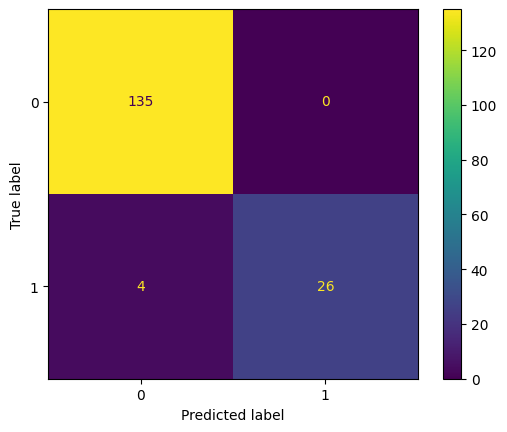

In [77]:
# confusion matrix for the B_model
cm=confusion_matrix(testy,predict_base)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

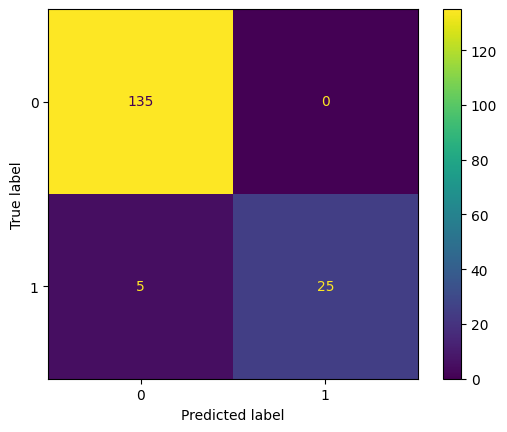

In [78]:
# confusion matrix for the BN_model
cm=confusion_matrix(testy,predict_base_BN)
disp_=ConfusionMatrixDisplay(cm)
disp_.plot()

In [79]:

def model_loss_curve(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["val_loss"][10:], "k-", linewidth=2, label="B_model")
    plt.plot(dataframe2['epochs'][10:],dataframe2["val_loss"][10:], "b-", linewidth=2, label="BN_model")
    plt.xlabel("epochs")
    plt.ylabel("Validation_loss")
    plt.legend()
    plt.plot()

In [70]:
# plo the accuracy of model
def model_accuracy_curve(dataframe,dataframe2):
    plt.plot(dataframe['epochs'][10:],dataframe["accuracy"][10:], "k-", linewidth=2, label='B_model')
    plt.plot(dataframe2['epochs'][10:],dataframe2["accuracy"][10:], "b-", linewidth=2, label="BN_model")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.plot()

# validation_loss vs epochs

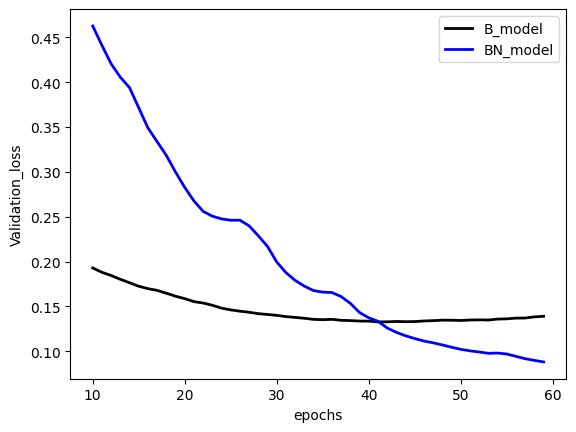

In [80]:

model_loss_curve(df1,df_BN)

# model_accuracy vs epochs

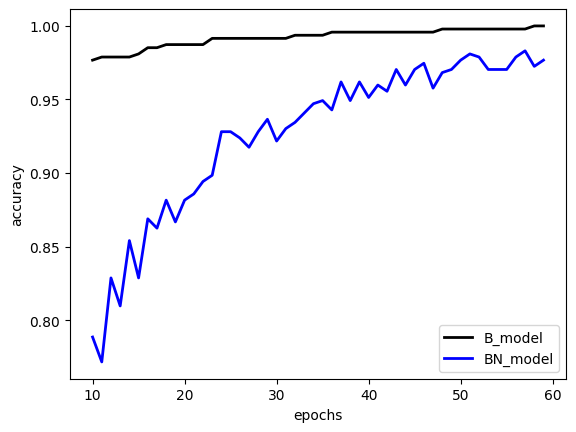

In [81]:
model_accuracy_curve(df1,df_BN)

## Building the Deep Learining model with following layers
Model 1 using the simple Dense layers
model 2 uisng the large number of dense layer.
Depends on the performance for classification task try to add dropout, binary regularization.

Steps followed to build, train and evaluate the performance of models.
1. Build the model using different layers
2. Use cross validation technique to split the dataset and training the model
3. based defined error term calculate the error of the model.
4. once model is trained, use test data for prediction
5. create the classification report and the confusion matric which helps to give a better understanding the performance of model

In [82]:

def model1():
    model=models.Sequential()
    model.add(layers.Dense(128,activation="relu",input_shape=(df_tr_x.shape[1],)))
    #model.add(layers.Dense(192,activation="relu"))
    #model.add(layers.Dense(128,activation="relu"))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(32,activation="relu"))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



def model2():
    model=models.Sequential()
    model.add(layers.Dense(128,activation="relu",input_shape=(df_tr_x.shape[1],)))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(118,activation="relu"))
    #model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(88,activation="relu"))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation="relu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32,activation="relu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [83]:
# hyperparameters
epochs=60
batch_size=100

In [84]:
# fusntion to plot the confusion matrix
def disp_confusion_matrix(true_y,pred_y):
    cm=confusion_matrix(true_y,pred_y)
    disp=ConfusionMatrixDisplay(cm)
    disp.plot()

In [85]:
# the k_fold method is used for cross validation
k_fold=StratifiedKFold(n_splits=5,shuffle=True)

In [101]:
# Training the model using training data and validating it performance using validation dataset
for train_index,cv_index in k_fold.split(df_tr_x,df_tr_y):
    train_x_fold, x_cv_fold = df_tr_x.iloc[train_index,:], df_tr_x.iloc[cv_index,:]
    train_y_fold, y_cv_fold = df_tr_y.iloc[train_index], df_tr_y.iloc[cv_index]

    # When model fails to convert data from datafraem to tensor, so we convert first the to array
    train_x_fold=np.asarray(train_x_fold).astype(np.float32)
    train_y_fold=np.asarray(train_y_fold).astype(np.float32)
    x_cv_fold=np.asarray(x_cv_fold).astype(np.float32)
    y_cv_fold=np.asarray(y_cv_fold).astype(np.float32)

    # call the models
    model_1=model1()
    model_2=model2()

    
    history1=model_1.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=60,validation_data=(x_cv_fold,y_cv_fold),verbose=0)
    history2=model_2.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=60,validation_data=(x_cv_fold,y_cv_fold),verbose=0)


In [103]:
# create new dataframe to save the the model parameters, different dataframe for different model 
df1_cv=pd.DataFrame(history1.history)
df1_cv["epochs"]=history1.epoch

df2_cv=pd.DataFrame(history2.history)
df2_cv["epochs"]=history2.epoch

In [104]:
# validation loss curve for both models

def model_loss_curve(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["val_loss"][10:], "k-", linewidth=2, label="model1")
    plt.plot(dataframe2['epochs'][10:],dataframe2["val_loss"][10:], "b-", linewidth=2, label="model2")
    plt.xlabel("epochs")
    plt.ylabel("Validation_loss")
    plt.legend()
    plt.plot()

In [105]:
# model loss curve for the both model
def model_accuracy_loss(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["loss"][10:], "k-", linewidth=2, label="model1")
    plt.plot(dataframe2['epochs'][10:],dataframe2["loss"][10:], "b-", linewidth=2, label="model2")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.plot()

In [106]:
# Model accuracy bcurve for the both
def model_accuracy(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["accuracy"][10:], "k-", linewidth=2, label="model1")
    plt.plot(dataframe2['epochs'][10:],dataframe2["accuracy"][10:], "b-", linewidth=2, label="model2")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.plot()

## model Performance evalution

In [108]:
prediction1=model_1.predict(testx)
prediction1=prediction1>0.5
prediction2=model_2.predict(testx)
prediction2=prediction2>0.5

6/6 [==============================] - 0s 4ms/step


In [109]:
# classification report of model1
print(classification_report(testy,prediction1))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       135
         1.0       0.96      0.90      0.93        30

    accuracy                           0.98       165
   macro avg       0.97      0.95      0.96       165
weighted avg       0.98      0.98      0.98       165



In [110]:
# classification report of model model2
print(classification_report(testy,prediction2))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       135
         1.0       0.93      0.90      0.92        30

    accuracy                           0.97       165
   macro avg       0.95      0.94      0.95       165
weighted avg       0.97      0.97      0.97       165



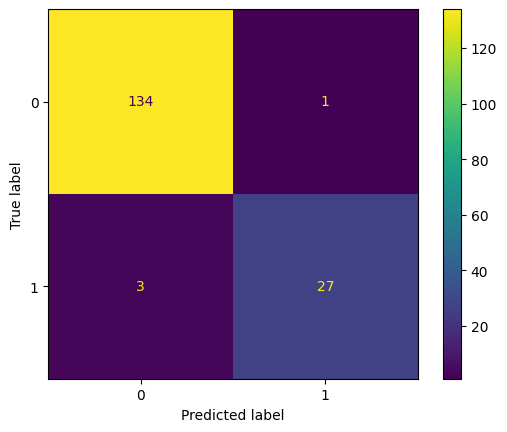

In [111]:
disp_confusion_matrix(testy,prediction1)

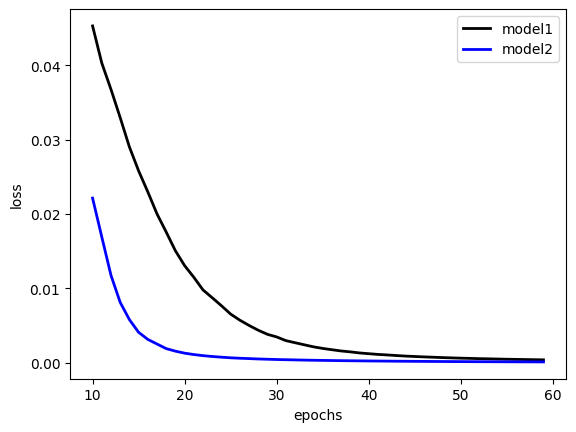

In [113]:
model_accuracy_loss(df1_cv,df2_cv)

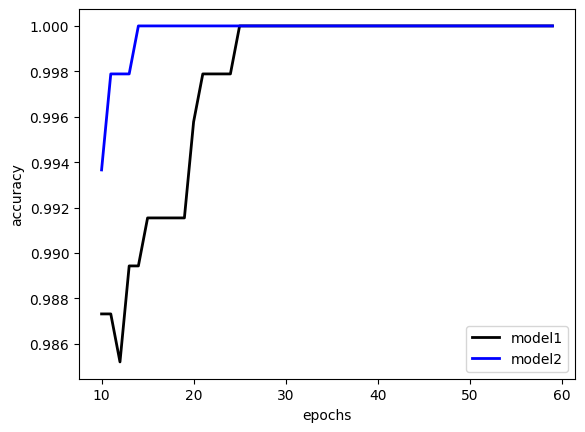

In [114]:
model_accuracy(df1_cv,df2_cv)

## As accuracy and F1 score is not that good model fails to provide the good perfomrance

## improve the model

In [115]:

def model1():
    model=models.Sequential()
    model.add(layers.Dense(128,activation="elu",input_shape=(df_tr_x.shape[1],)))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(118,activation="elu"))
    #model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(88,activation="relu"))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation="elu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32,activation="elu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def model2():

    model=models.Sequential()
    model.add(layers.Dense(128,activation="elu",input_shape=(df_tr_x.shape[1],)))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(118,activation="elu"))
    #model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(88,activation="relu"))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation="elu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32,activation="elu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [116]:
# Training the model using training data and validating it performance using validation dataset
for train_index,cv_index in k_fold.split(df_tr_x,df_tr_y):
    train_x_fold, x_cv_fold = df_tr_x.iloc[train_index,:], df_tr_x.iloc[cv_index,:]
    train_y_fold, y_cv_fold = df_tr_y.iloc[train_index], df_tr_y.iloc[cv_index]

    # When model fails to convert data from datafraem to tensor, so we convert first the to array
    train_x_fold=np.asarray(train_x_fold).astype(np.float32)
    train_y_fold=np.asarray(train_y_fold).astype(np.float32)
    x_cv_fold=np.asarray(x_cv_fold).astype(np.float32)
    y_cv_fold=np.asarray(y_cv_fold).astype(np.float32)

    # call the models
    model_1=model1()
    model_2=model2()

    
    history1=model_1.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=epochs,validation_data=(x_cv_fold,y_cv_fold),verbose=0)
    history2=model_2.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=epochs,validation_data=(x_cv_fold,y_cv_fold),verbose=0)



    

In [117]:
# create new dataframe to save the the model parameters, different dataframe for different model 
df3_cv=pd.DataFrame(history1.history)
df3_cv["epochs"]=history1.epoch

df4_cv=pd.DataFrame(history2.history)
df4_cv["epochs"]=history2.epoch

In [118]:
df3_cv.shape

(60, 5)

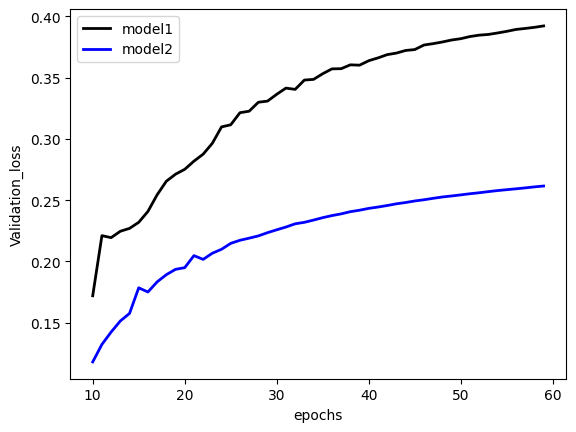

In [119]:
model_loss_curve(df3_cv,df4_cv)

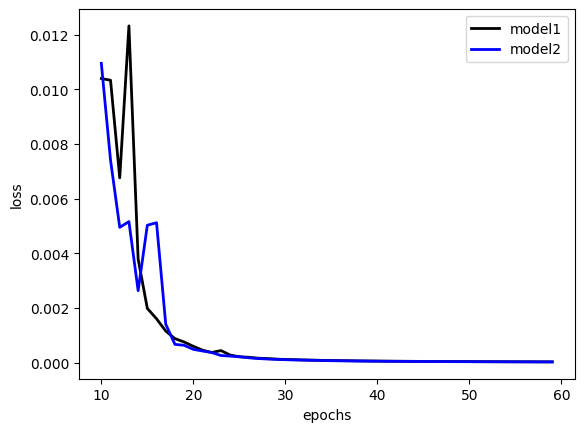

In [120]:
model_accuracy_loss(df3_cv,df4_cv)

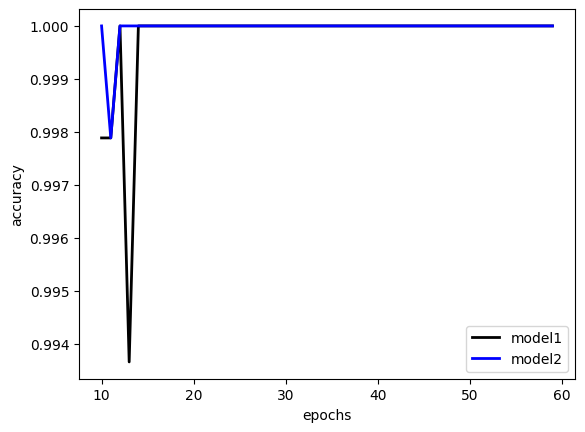

In [121]:
model_accuracy(df3_cv,df4_cv)

In [124]:
predictor=model_2.predict(testx)
predictor=predictor>0.5

6/6 [==============================] - 0s 2ms/step


In [125]:
print(classification_report(testy,predictor))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       135
         1.0       0.96      0.90      0.93        30

    accuracy                           0.98       165
   macro avg       0.97      0.95      0.96       165
weighted avg       0.98      0.98      0.98       165



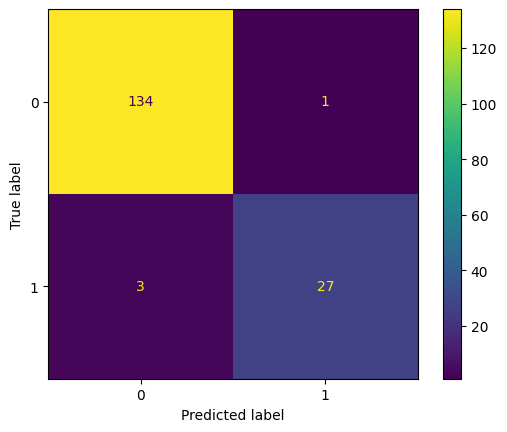

In [126]:
disp_confusion_matrix(testy,predictor)

## Replace values with median


In [127]:
data=pd.DataFrame(df_train.isnull().sum().nlargest(7))
data1=pd.DataFrame(df_test.isnull().sum().nlargest(7))

data1.reset_index(inplace=True)
data.reset_index(inplace=True)

In [128]:
df_median_train=df_train.drop(np.asarray(data["index"]),axis=1)
df_median_test=df_test.drop(np.asarray(data1["index"]),axis=1)

In [129]:
# dataframes filled with median values 
df_median_train=df_median_train.fillna(df_median_train.median())
df_median_test=df_median_test.fillna(df_median_test.median())

In [130]:
# split data inot x and y
data_trmedian_x=df_median_train.drop(["class"],axis=1)
data_trmedian_y=df_median_train["class"]

data_temedian_x=df_median_test.drop(["class"],axis=1)
data_temedian_y=df_median_test["class"]

In [131]:
data_trmedian_x=pd.DataFrame(Normalize.fit_transform(data_trmedian_x))
data_temedian_x=pd.DataFrame(Normalize.fit_transform(data_temedian_x))

In [132]:
# x_train = np.asarray(data_trmedian_x).astype(np.float32)
# y_train = np.asarray(data_trmedian_y).astype(np.float32)

# x_test = np.asarray(data_temedian_x).astype(np.float32)
# y_test = np.asarray(data_temedian_y).astype(np.float32)

## implement the machine learning models

In [142]:
def B_model1():
    model = models.Sequential()
    model.add(layers.Dense(60, input_shape=(163,), activation='relu'))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model    


In [143]:
def BN_model():
    model=models.Sequential()
    model.add(layers.Dense(60, input_shape=(163,), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(30,activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    # compile the model
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model
    

In [144]:
# Training the model using training data and validating it performance using validation dataset
for train_index,cv_index in k_fold.split(data_trmedian_x,data_trmedian_y):
    train_x_fold, x_cv_fold = data_trmedian_x.iloc[train_index,:], data_trmedian_x.iloc[cv_index,:]
    train_y_fold, y_cv_fold = data_trmedian_y.iloc[train_index], data_trmedian_y.iloc[cv_index]

    # When model fails to convert data from datafraem to tensor, so we convert first the to array
    train_x_fold=np.asarray(train_x_fold).astype(np.float32)
    train_y_fold=np.asarray(train_y_fold).astype(np.float32)
    x_cv_fold=np.asarray(x_cv_fold).astype(np.float32)
    y_cv_fold=np.asarray(y_cv_fold).astype(np.float32)

    # call the models
    model_1=B_model1()
    model_2=BN_model()

    
    history1=model_1.fit(train_x_fold,train_y_fold,batch_size=100,epochs=60,validation_data=(x_cv_fold,y_cv_fold),verbose=0)
    history2=model_2.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=60,validation_data=(x_cv_fold,y_cv_fold),verbose=0)


In [170]:
dfMedian_B=pd.DataFrame(history1.history)
dfMedian_B["epochs"]=history1.epoch

dfMedian_BN=pd.DataFrame(history2.history)
dfMedian_BN["epochs"]=history2.epoch

In [171]:
# prediction using model B_model
pred_med=model_1.predict(data_temedian_x)
pred_med=pred_med>0.5
pred_med_BN=model_2.predict(data_temedian_x)
pred_med_BN=pred_med_BN>0.5

500/500 [==============================] - 1s 2ms/step


In [172]:
print(classification_report(data_temedian_y,pred_med))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15625
         1.0       0.66      0.71      0.68       375

    accuracy                           0.98     16000
   macro avg       0.83      0.85      0.84     16000
weighted avg       0.99      0.98      0.98     16000



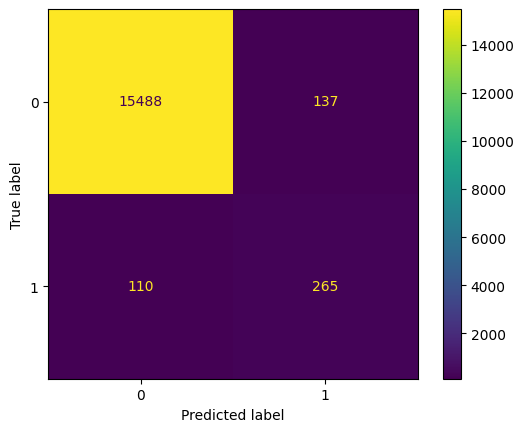

In [173]:
ConfusionMatrixDisplay(confusion_matrix(data_temedian_y,pred_med)).plot()

In [174]:
print(classification_report(data_temedian_y,pred_med_BN))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15625
         1.0       0.98      0.45      0.62       375

    accuracy                           0.99     16000
   macro avg       0.98      0.73      0.81     16000
weighted avg       0.99      0.99      0.98     16000



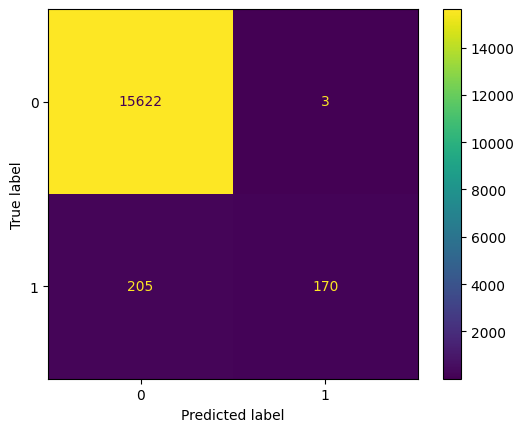

In [175]:
ConfusionMatrixDisplay(confusion_matrix(data_temedian_y,pred_med_BN)).plot()

In [167]:
def model_loss_curve(dataframe1):
    plt.plot(dataframe1['epochs'][10:],dataframe1["val_loss"][10:], "k-", linewidth=1, label="model1")
    plt.xlabel("epochs")
    plt.ylabel("Validation_loss")
    plt.legend()
    plt.plot()

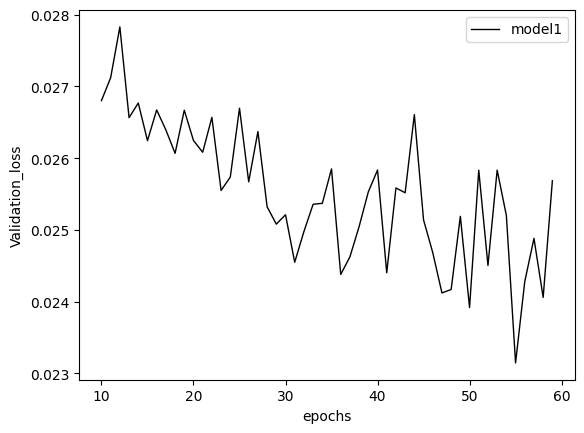

In [178]:
model_loss_curve(dfMedian_BN)

In [152]:
# model loss curve for the both model
def model1_accuracy_loss(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["loss"][10:], "k-", linewidth=2, label="model1")
    plt.plot(dataframe2['epochs'][10:],dataframe2["loss"][10:], "b-", linewidth=2, label="model2")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.plot()

def model1_valloss_curve(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["val_loss"][10:], "k-", linewidth=2, label="model1")
    plt.plot(dataframe2['epochs'][10:],dataframe2["val_loss"][10:], "b-", linewidth=2, label="model2")
    plt.xlabel("epochs")
    plt.ylabel("Validation_loss")
    plt.legend()
    plt.plot()


# Model accuracy bcurve for the both
def model1_accuracy(dataframe1,dataframe2):
    plt.plot(dataframe1['epochs'][10:],dataframe1["accuracy"][10:], "k-", linewidth=2, label="model1")
    plt.plot(dataframe2['epochs'][10:],dataframe2["accuracy"][10:], "b-", linewidth=2, label="model2")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend()
    plt.plot()

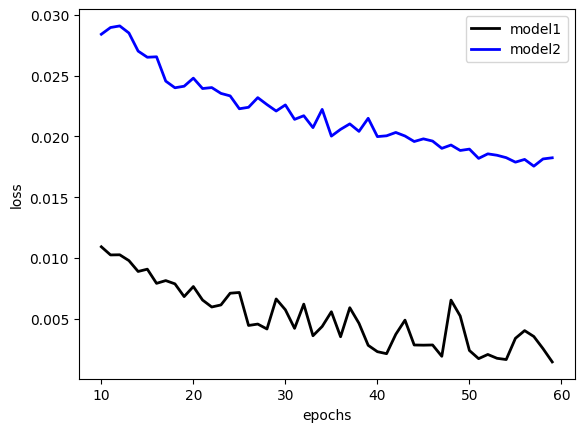

In [179]:
model1_accuracy_loss(dfMedian_B,dfMedian_BN)

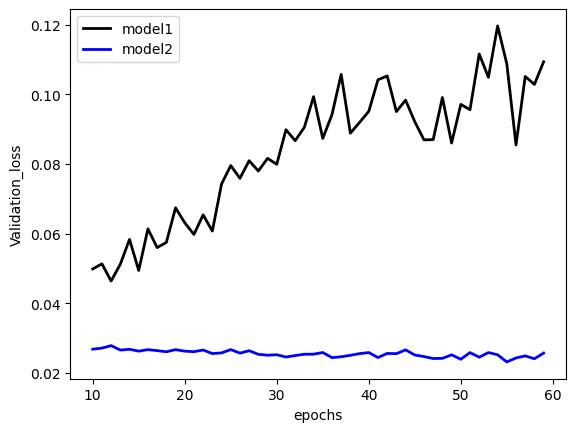

In [180]:
model1_valloss_curve(dfMedian_B,dfMedian_BN)

## 2 Second Deep Learning Approach

In [178]:

def model1():
    model=models.Sequential()
    model.add(layers.Dense(128,activation="relu",input_shape=(data_trmedian_x.shape[1],)))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(118,activation="relu"))
    #model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(88,activation="relu"))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation="relu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32,activation="relu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def model2():

    model=models.Sequential()
    model.add(layers.Dense(128,activation="relu",input_shape=(data_trmedian_x.shape[1],)))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(118,activation="relu"))
    #model.add(layers.Dropout(0.5))
    # model.add(layers.Dense(88,activation="relu"))
    # model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64,activation="relu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32,activation="relu"))
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [179]:
# Training the model using training data and validating it performance using validation dataset
for train_index,cv_index in k_fold.split(data_trmedian_x,data_trmedian_y):
    train_x_fold, x_cv_fold = data_trmedian_x.iloc[train_index,:], data_trmedian_x.iloc[cv_index,:]
    train_y_fold, y_cv_fold = data_trmedian_y.iloc[train_index], data_trmedian_y.iloc[cv_index]

    # When model fails to convert data from datafraem to tensor, so we convert first the to array
    train_x_fold=np.asarray(train_x_fold).astype(np.float32)
    train_y_fold=np.asarray(train_y_fold).astype(np.float32)
    x_cv_fold=np.asarray(x_cv_fold).astype(np.float32)
    y_cv_fold=np.asarray(y_cv_fold).astype(np.float32)

    # call the models
    model_1=model1()
    model_2=model2()

    
    history1=model_1.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=200,validation_data=(x_cv_fold,y_cv_fold),verbose=0)
    history2=model_2.fit(train_x_fold,train_y_fold,batch_size=batch_size,epochs=200,validation_data=(x_cv_fold,y_cv_fold),verbose=0)


In [180]:
df5_cv=pd.DataFrame(history1.history)
df5_cv["epochs"]=history1.epoch

df6_cv=pd.DataFrame(history2.history)
df6_cv["epochs"]=history2.epoch

In [205]:
pred_m1=model_1.predict(data_temedian_x)
pred_m2=model_2.predict(data_temedian_x)

500/500 [==============================] - 1s 2ms/step


In [207]:
pred_m1

array([[1.3182960e-06],
       [2.9306240e-13],
       [5.0306576e-38],
       ...,
       [5.4712417e-36],
       [1.0011730e-09],
       [5.9299167e-15]], dtype=float32)

In [206]:
# for model_1
print(classification_report(data_temedian_y,pred_m1))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

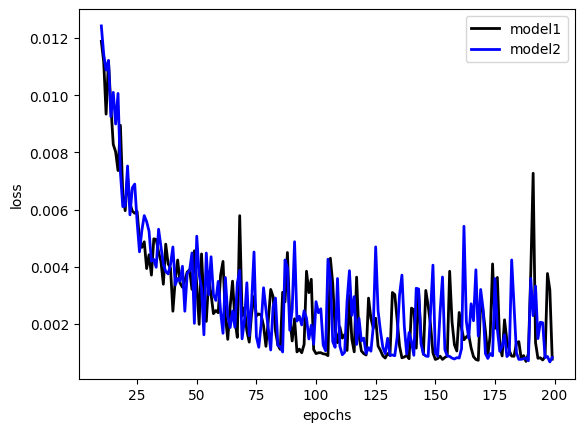

In [201]:
model1_accuracy_loss(df5_cv,df6_cv)


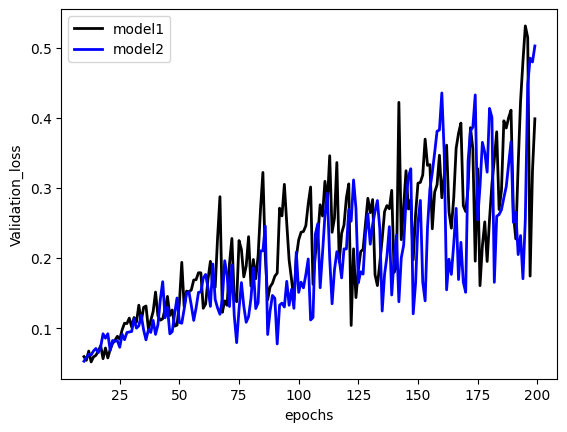

In [202]:
model1_valloss_curve(df5_cv,df6_cv)


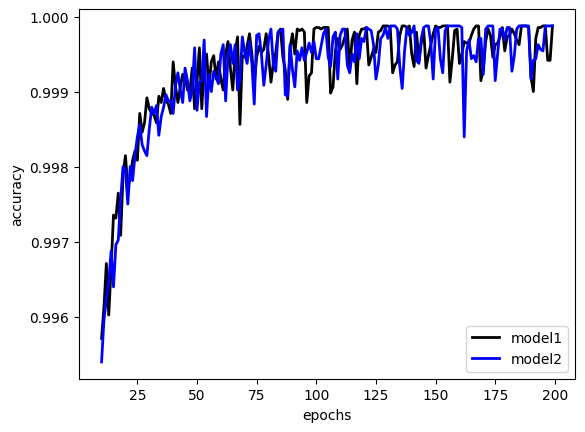

In [203]:
model1_accuracy(df5_cv,df6_cv)

## We have prepared the data in which we have replaced the null values with help of median of each column, Now let implement the machin learning methods to see the performance it on this dataset

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,precision_recall_curve,average_precision_score,auc,roc_curve

In [222]:
# Hyperparameters:
penalty = 'l2'
C = 5.0 #regularization strength. The smaller the value, the stronger the regularization.
random_state = 2021
solver = 'liblinear' # For small datasets, it is good.
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

In [66]:
trainx,trainy=data_trmedian_x,data_trmedian_y

In [224]:
TotalPredictPro=pd.DataFrame(data=[],index=trainy.index,columns=[0,1])
Score_train=[]
Score_cv=[]
for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    logReg.fit(train_x_fold,train_y_fold)

    predictpro_tr=logReg.predict_proba(train_x_fold)  # predict_proba is confidence score of detected value be;ongs to perticular class
    entropy_loss_tr=log_loss(train_y_fold,predictpro_tr)
    Score_train.append(entropy_loss_tr)


    predictpro_val=logReg.predict_proba(x_cv_fold)
    entropy_loss_val=log_loss(y_cv_fold,predictpro_val)
    Score_cv.append(entropy_loss_val)


    TotalPredictPro.loc[x_cv_fold.index,:] =logReg.predict_proba(x_cv_fold)


    print("******************************************************")
    print(f"The log_loss on training dataset is { entropy_loss_tr}")
    print(f"The log_loss on training dataset is { entropy_loss_val}")

print("**********************************************")
predicty=logReg.predict_proba(trainx)
total_entropy_loss=log_loss(trainy,predicty)

print(f"Total log_loss given as {total_entropy_loss}")


******************************************************
The log_loss on training dataset is 0.024810229863941373
The log_loss on training dataset is 0.03371075420860135
******************************************************
The log_loss on training dataset is 0.023816339650153413
The log_loss on training dataset is 0.03415449507954499
******************************************************
The log_loss on training dataset is 0.024369514650350074
The log_loss on training dataset is 0.02976507868558069
******************************************************
The log_loss on training dataset is 0.02394756818823523
The log_loss on training dataset is 0.034455404518299815
******************************************************
The log_loss on training dataset is 0.023118974673025344
The log_loss on training dataset is 0.04214587175292573
**********************************************
Total log_loss given as 0.02692435408900542


In [225]:
pred=logReg.predict(data_temedian_x)

In [226]:
# classification report 
print(classification_report(data_temedian_y,pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     15625
         1.0       0.92      0.44      0.60       375

    accuracy                           0.99     16000
   macro avg       0.95      0.72      0.79     16000
weighted avg       0.99      0.99      0.98     16000



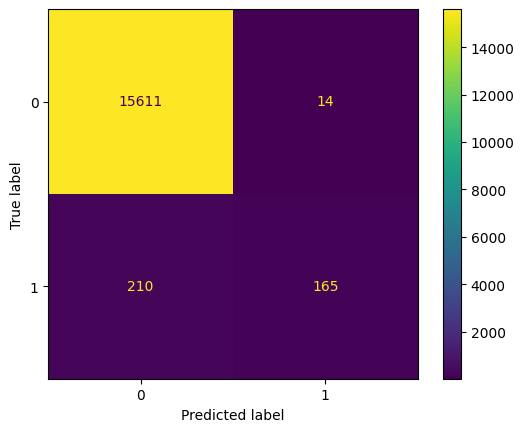

In [227]:
# plot confusion matrix
cm=confusion_matrix(data_temedian_y,pred)
display=ConfusionMatrixDisplay(cm)
display.plot()

Have look at the recall rate when c=5, which mean the failures which had happened because of ASP is misclassified. This may reduce the maintance cost but neglecting this may cause the big damage may be accident or break fail. 

In [228]:
# model Accuracy
accuracy_score(data_temedian_y,pred)

0.986

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.76')

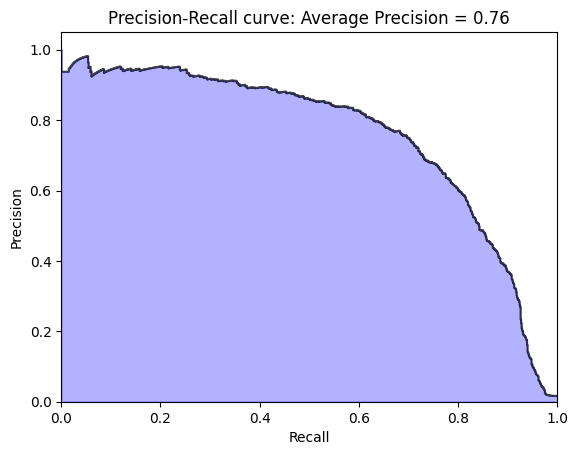

In [229]:
# precision and recall curve


preds = pd.concat([trainy,TotalPredictPro.loc[:,1]], axis=1)  # add two column to create a datafarme
preds.columns = ['trueLabel','prediction']
TotalPredictPro = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

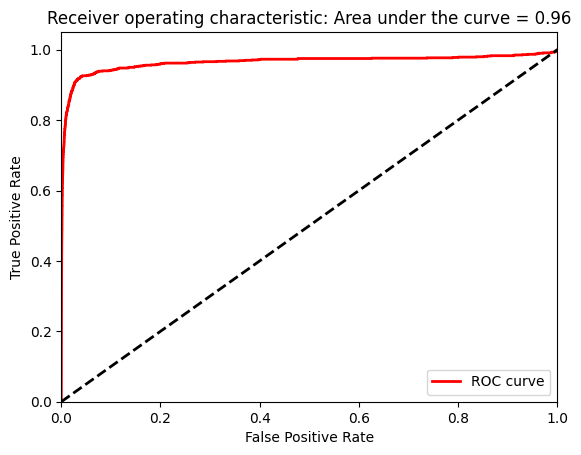

In [230]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Support Vector Machine

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [64]:
svc=SVC(kernel="linear",gamma="auto",probability=True,C=1)

model_svc=svc

#Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [67]:
totalPredictPro_svc=pd.DataFrame(data=[],index=trainy.index,columns=[0,1])
Score_train=[]
Score_cv=[]
for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model_svc.fit(train_x_fold,train_y_fold)

    predictpro_tr=model_svc.predict_proba(train_x_fold)  # predict_proba is confidence score of detected value be;ongs to perticular class
    entropy_loss_tr=log_loss(train_y_fold,predictpro_tr)
    Score_train.append(entropy_loss_tr)


    predictpro_val=model_svc.predict_proba(x_cv_fold)
    entropy_loss_val=log_loss(y_cv_fold,predictpro_val)
    Score_cv.append(entropy_loss_val)


    totalPredictPro_svc.loc[x_cv_fold.index,:] =model_svc.predict_proba(x_cv_fold)


    print("******************************************************")
    print(f"The log_loss on training dataset is { entropy_loss_tr}")
    print(f"The log_loss on training dataset is { entropy_loss_val}")

print("**********************************************")
predicty=model_svc.predict_proba(trainx)
total_entropy_loss=log_loss(trainy,predicty)

print(f"Total log_loss given as {total_entropy_loss}")


In [ ]:
pre_svc=model_svc.predict(data_temedian_x)

In [ ]:
print(classification_report(data_temedian_y,pred_svc))

In [ ]:
# plot confusion matrix
cm=confusion_matrix(data_temedian_y,pred_svc)
display=ConfusionMatrixDisplay(cm)
display.plot()

In [ ]:
# precision and recall curve


preds = pd.concat([trainy,totalPredictPro_svc.loc[:,1]], axis=1)

preds.columns = ['trueLabel','prediction']
totalPredictPro_svc = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

In [ ]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in the forest:
n_estimators = 15
# Number of features to consider when looking for the best split:
max_features="sqrt"
# Maximum depth of the tree:
max_depth = 20
# Minimum number of samples required to split an internal node:
min_samples_split = 3
# Minimum number of samples required to be at a leaf node:
min_samples_leaf = 1
# Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
max_leaf_nodes = None
# Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree:
bootstrap = False
# Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
oob_score = False
# Number of jobs to run in parallel. (-1) means use all.
n_jobs = -1
# Random state
random_state = 2020
#-----------------------------------------------------------------
# Creating the classifier:
RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, \
                              max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,oob_score=oob_score, n_jobs=n_jobs, random_state=random_state)

In [ ]:
model1=RFC

trainScore=[]
valScore=[]
total_prob_rfc=pd.DataFrame(data=[],index=trainx.index,columns=[0,1])


for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model1.fit(train_x_fold,train_y_fold)
    # let look at prediction probability of being 0(neg) or 1(pos) for training fold
    prob_train=model1.predict_proba(train_x_fold)
    loglosstrain=log_loss(train_y_fold,prob_train)
    trainScore.append(loglosstrain)

    # let look at prediction probability of being 0(neg) or 1(pos) for cv fold
    prob_cv=model1.predict_proba(x_cv_fold)
    loglosscv=log_loss(y_cv_fold,prob_cv)
    valScore.append(loglosscv)


    total_prob_rfc.loc[x_cv_fold.index,:]=model1.predict_proba(x_cv_fold)
    
    print("**************************************")
    print(f"Training Log Loss is {loglosstrain}")
    print(f"CV Log Loss is {loglosscv}")

pre_train_y=model1.predict_proba(trainx)
loglosstotal=log_loss(trainy,pre_train_y) 

print("************************************")
print(f"RFC log loss {loglosstotal}")


In [ ]:
predict_RF=model1.predict(data_temedian_x)

In [ ]:
print(classification_report(data_temedian_y,predict_RF))

In [ ]:

cm=confusion_matrix(data_temedian_y,predict_RF)
dis=ConfusionMatrixDisplay(cm)
dis.plot()

In [ ]:
preds = pd.concat([trainy,total_prob_rfc.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
total_prob_rfc = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

In [ ]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## Adaboost

In [ ]:
# adaboost hyperparameters

n_estimators=20
learning_rate=0.0001
algorithm="SAMME.R"        #{‘SAMME’, ‘SAMME.R’}, default=’SAMME.R’

adaboost=AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate,algorithm=algorithm,random_state=2020)

In [ ]:
model1=adaboost

trainScore=[]
valScore=[]
TotalPredictPro_ada=pd.DataFrame(data=[],index=trainx.index,columns=[0,1])


for train_index,cv_index in k_fold.split(trainx,trainy):
    train_x_fold, x_cv_fold = trainx.iloc[train_index,:], trainx.iloc[cv_index,:]
    train_y_fold, y_cv_fold = trainy.iloc[train_index], trainy.iloc[cv_index]

    model1.fit(train_x_fold,train_y_fold)
    # let look at prediction probability of being 0(neg) or 1(pos) for training fold
    prob_train=model1.predict_proba(train_x_fold)
    loglosstrain=log_loss(train_y_fold,prob_train)
    trainScore.append(loglosstrain)

    # let look at prediction probability of being 0(neg) or 1(pos) for cv fold
    prob_cv=model1.predict_proba(x_cv_fold)
    loglosscv=log_loss(y_cv_fold,prob_cv)
    valScore.append(loglosscv)


    TotalPredictPro_ada.loc[x_cv_fold.index,:]=model1.predict_proba(x_cv_fold)
    
    print("**************************************")
    print(f"Training Log Loss is {loglosstrain}")
    print(f"CV Log Loss is {loglosscv}")

pre_train_y=model1.predict_proba(trainx)
loglosstotal=log_loss(trainy,pre_train_y) 

print("************************************")
print(f"RFC log loss {loglosstotal}")


In [ ]:
predict_ad=model1.predict(testx)

In [ ]:
print(classification_report(testy,predict_ad))

In [ ]:
cm=confusion_matrix(testy,predict_ad)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
# precision and recall curve


preds_ada = pd.concat([trainy,TotalPredictPro_ada.loc[:,1]], axis=1)  # add two column to create a datafarme
preds_ada.columns = ['trueLabel','prediction']
TotalPredictPro_ada = preds_ada.copy()
precision, recall, thresholds = precision_recall_curve(preds_ada['trueLabel'],preds_ada['prediction'])
average_precision = average_precision_score(preds_ada['trueLabel'],preds_ada['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

In [ ]:
fpr, tpr, thresholds = roc_curve(preds_ada['trueLabel'],preds_ada['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()